# Project Case Scenario

Is there a significant difference in the median value of houses bounded by the Charles river or not?

Is there a difference in median values of houses of each proportion of owner-occupied units built before 1940?

Can we conclude that there is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town?

What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes?

## Prepare for the task

In [1]:
#Import the libraries we need
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats

In [2]:
#Read in the csv file from the URL 
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [3]:
#Check and clean the data before the work
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.5 KB


In [7]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [4]:
boston_df.rename(columns={'Unnamed: 0':'ID'}, inplace=True)
boston_df.head()

,ID,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


The following describes the dataset variables:

·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's

## Task 4: Generate Descriptive Statistics and Visualizations

For all visualizations, please include a title in each graph and appropriate labels

Generate the following and explain your findings:

1.For the "Median value of owner-occupied homes" provide a boxplot (MEDV)

2.Provide a  bar plot for the Charles river variable (CHAS)

3.Provide a boxplot for the MEDV variable vs the AGE variable. 
(Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older) (MEDV, AGE)

4.Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship? (NOX, INDUS)

5.Create a histogram for the pupil to teacher ratio variable (PTRATIO)

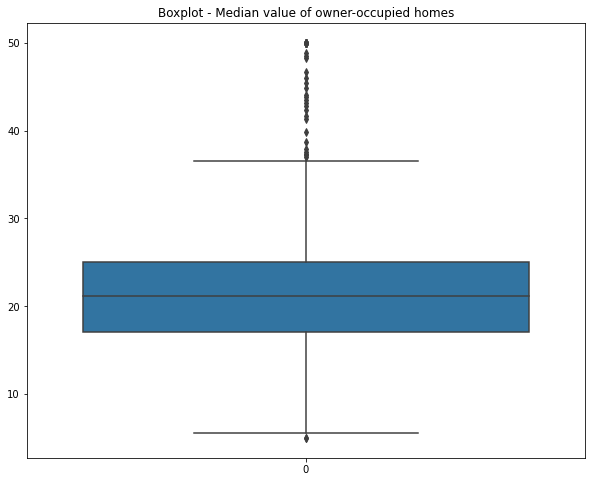

In [5]:
#1.For the "Median value of owner-occupied homes" provide a boxplot (MEDV)
plt.figure(figsize=(10.0, 8.0))
plt.title('Boxplot - Median value of owner-occupied homes')
sns.boxplot(data=boston_df['MEDV'])
plt.show()

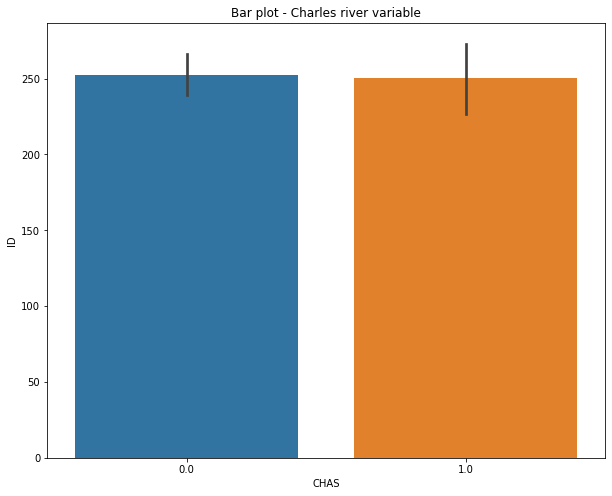

In [6]:
#2.Provide a bar plot for the Charles river variable (CHAS)
plt.figure(figsize=(10.0, 8.0))
plt.title('Bar plot - Charles river variable')
sns.barplot(data=boston_df, x='CHAS', y='ID')
plt.show()

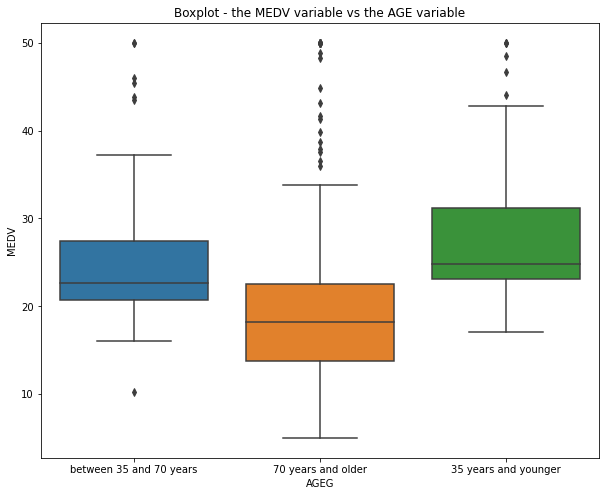

In [7]:

#3.Provide a boxplot for the MEDV variable vs the AGE variable.
"""
Discretize the age variable into three groups of 35 years and younger, 
between 35 and 70 years and 70 years and older (MEDV, AGE)
"""
boston_df.loc[(boston_df['AGE'] <= 35), 'AGEG'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'AGEG'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'AGEG'] = '70 years and older'

plt.figure(figsize=(10.0, 8.0))
plt.title('Boxplot - the MEDV variable vs the AGE variable')
sns.boxplot(data=boston_df, x='AGEG', y='MEDV')
plt.show()


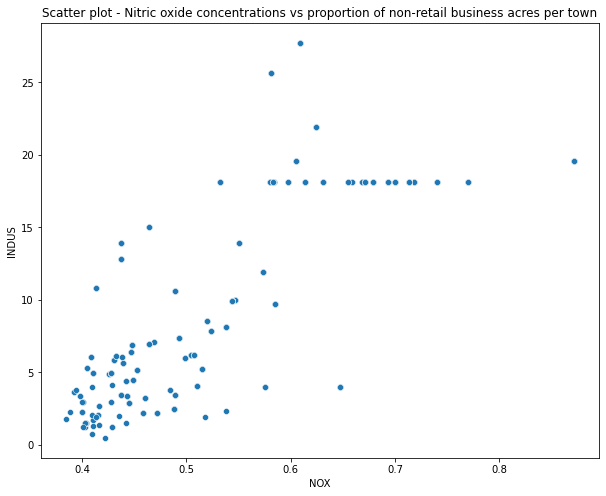

In [8]:
#4.Provide a scatter plot to show the relationship between Nitric oxide concentrations and 
#the proportion of non-retail business acres per town. 
#What can you say about the relationship? (NOX, INDUS)

plt.figure(figsize=(10.0, 8.0))
plt.title('Scatter plot - Nitric oxide concentrations vs proportion of non-retail business acres per town')
sns.scatterplot(data=boston_df, x='NOX', y='INDUS')
plt.show()

#it suggests a positive relationship, indicating that as NOX increases, INDUS tends to increase as well. 


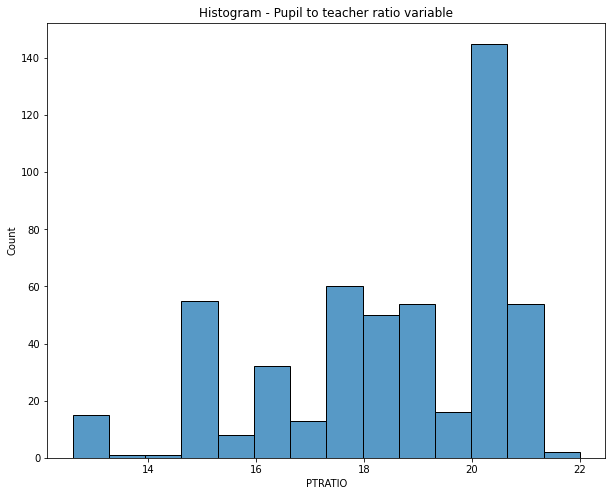

In [9]:
#5.Create a histogram for the pupil to teacher ratio variable (PTRATIO)
plt.figure(figsize=(10.0, 8.0))
plt.title('Histogram - Pupil to teacher ratio variable')
sns.histplot(data=boston_df, x='PTRATIO')
plt.show()


## Task 5: Use the appropriate tests to answer the questions provided.


For each of the following questions;

1.Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples) (MEDV-CHAS)

2.Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

3.Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation) (NOX-INDUS)

4.What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis) (DIS-MEDV)

Be sure to:

State your hypothesis.

Use α = 0.05

Perform the test Statistics.

State the conclusion from the test.



In [15]:
# 1.Is there a significant difference in median value of houses bounded by the Charles river or not? 
# (T-test for independent samples) (MEDV-CHAS)

"""
State the hypothesis:
H0: u1 = u2 ("there is no difference in median value of houses bounded by the Charles river or not")
H1: u1 != u2 ("there is difference in median value of houses bounded by the Charles river or not")

"""
print(scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1.0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0.0]['MEDV'],equal_var = True))

'''
pvalue=7.390623170519905e-05) < a(0.05)

Conclusion: Since the p-value is less than alpha value 0.05, we reject the null hypothesis as 
there is enough proof that there is a statistical difference in median value of houses 
bounded by the Charles river or not
'''


Ttest_indResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05)


'\npvalue=7.390623170519905e-05) < a(0.05)\n\nConclusion: Since the p-value is less than alpha value 0.05, we reject the null hypothesis as \nthere is enough proof that there is a statistical difference in median value of houses \nbounded by the Charles river or not\n'

In [12]:
# 2.Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units 
# built prior to 1940 (AGE)? (ANOVA)

"""
Now is 2023 so we need to focus on the houses with the age more than or equal to 83 years
we will create a new column 'P1940' for this newly assigned group our categories:

N (with age younger than 83 years)
Y (with age equal to or more than 83 years)


State the hypothesis:
H0: u1 = u2 ("Means in Median values of houses bulit prior to 1940 or not are equal")
H1: u1 != u2 ("Means in Median values of houses bulit prior to 1940 or not are not equal")

"""


boston_df.loc[(boston_df['AGE'] < 83),'P1940'] = 'N'
boston_df.loc[(boston_df['AGE'] >= 83),'P1940'] = 'Y'

P1940N = boston_df[boston_df['P1940'] == 'N']['MEDV']
P1940Y = boston_df[boston_df['P1940'] == 'Y']['MEDV']

f_statistic, p_value = scipy.stats.f_oneway(P1940N,P1940Y)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

'''
Conclusion: Since the p-value is less than 0.05, we will reject the null hypothesis 
as there is significant evidence that means in Median values of houses bulit prior to 1940 or not differ.
'''


F_Statistic: 65.51513325324017, P-Value: 4.354004757227418e-15


In [17]:
# 3.Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of 
# non-retail business acres per town? (Pearson Correlation) (NOX-INDUS)

"""
State the hypothesis:
H0: "there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town")
H1: "there is relationship between Nitric oxide concentrations and proportion of non-retail business acres per town")

They are both continuous variables we can use a pearson correlation test.

"""

r, p_value = scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])
print("r: {0}, P-Value: {1}".format(r,p_value))

'''
Conclusion: Since the p-value is less than alpha value 0.05, we reject the null hypothesis as 
there is enough proof that there is relationship between Nitric oxide concentrations and 
proportion of non-retail business acres per town.
r>0 implies a positive relationship in correlation between two values.
'''


r: 0.7636514469209161, P-Value: 7.913361061230596e-98


In [18]:
# 4.What is the impact of an additional weighted distance to the five Boston employment centres 
#on the median value of owner occupied homes? (Regression analysis) (DIS-MEDV)

"""
State the hypothesis:
H0: B1=0 "Additional weighted distance to the five Boston employment centres has no effect on 
        the median value of owner occupied homes")
H1: B1!=0"Additional weighted distance to the five Boston employment centres has effect on 
        the median value of owner occupied homes")
        
"""

X = boston_df['DIS']
y = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

'''
Conclusion: The p-value is less than the alpha level = 0.05, 
so we reject the null hypothesis as there is evidence that Additional weighted distance to the five Boston employment centres 
has effect on the median value of owner occupied homes

The coefficient 1.0916 implies that there is a positive relationship between two values.

The R-squared value of 0.061 indicates that approximately 6.2% of the variance in the dependent variable 
can be explained by the independent variable(s) included in the model. 
There is a very weak correlation between two values.
'''


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 18 Dec 2023   Prob (F-statistic):           1.21e-08
Time:                        00:22:27   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""